# K Nearest Neighbors Project 

In this project we will use an artificial dataset and apply KNN to it.

### Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset

In [2]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [5]:
df.columns

Index(['XVPM', 'GWYH', 'TRAT', 'TLLZ', 'IGGA', 'HYKR', 'EDFS', 'GUUB', 'MGJM',
       'JHZC', 'TARGET CLASS'],
      dtype='object')

As you can see, the columns have no specific meaning except for the last one which is our target class.

## Exploratory Data Analysis

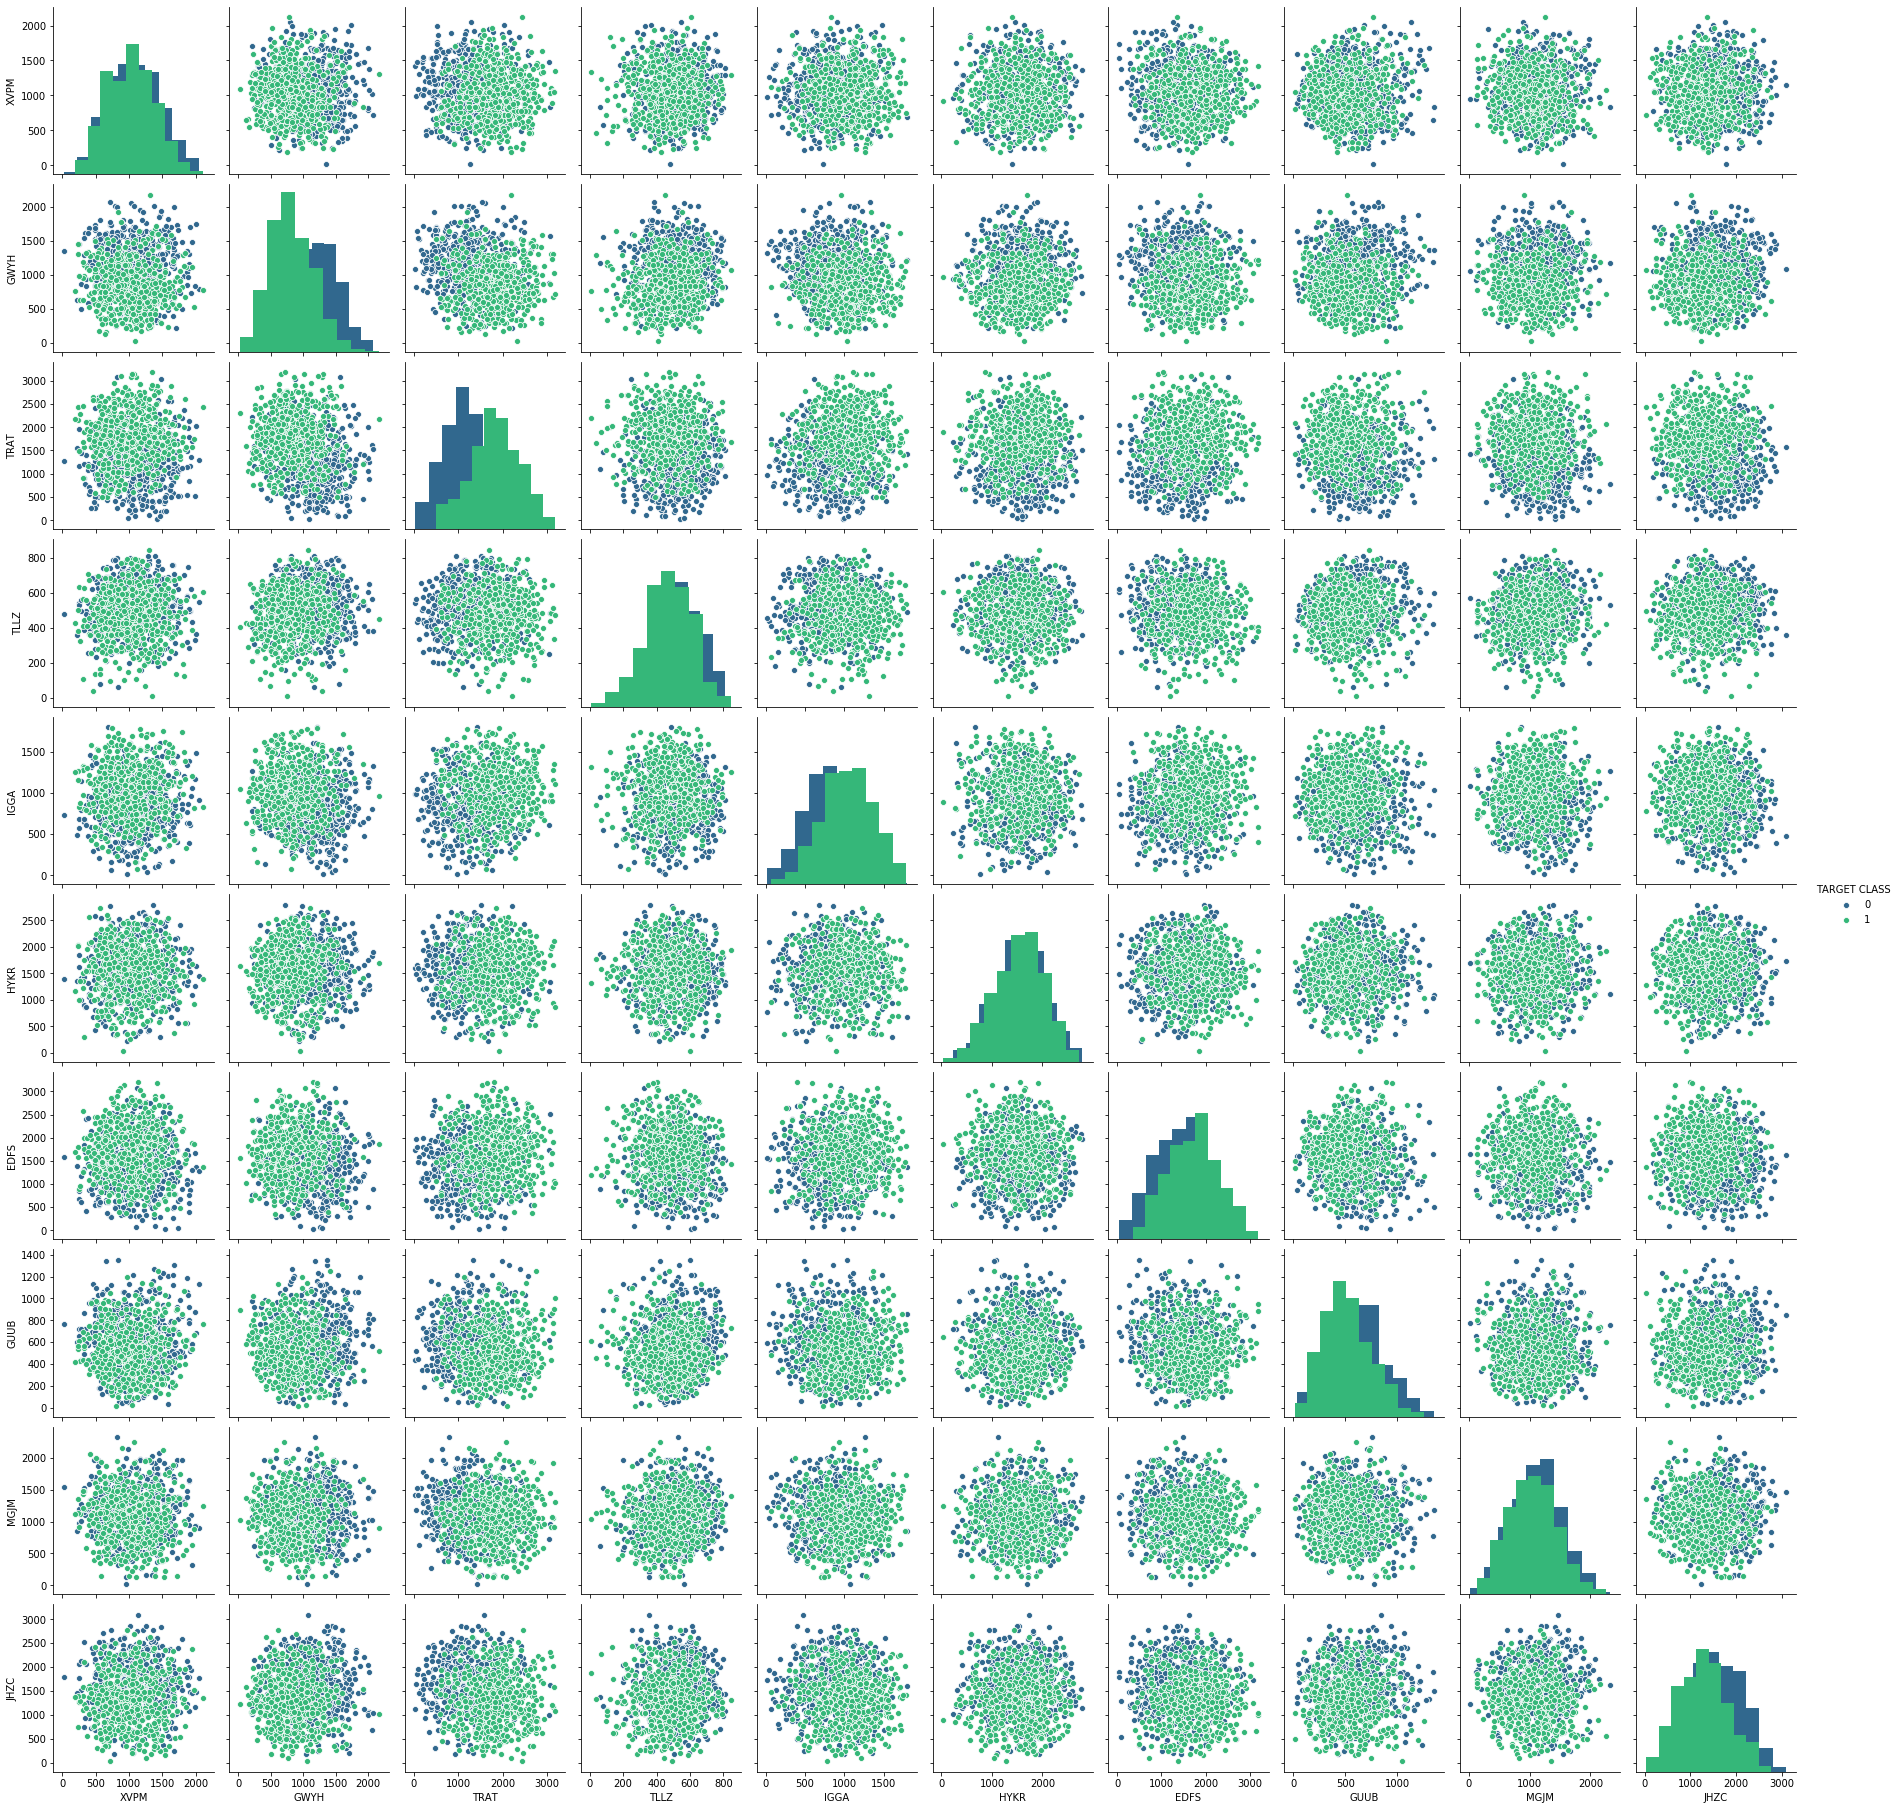

In [6]:
sns.pairplot(df, hue='TARGET CLASS', diag_kind='hist', palette='viridis');

## Standardize the Variables

Time to standardize the variables.

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1)) #using all columns except target class
scaled = scaler.transform(df.drop('TARGET CLASS', axis=1)) #applying the trnasformation
df_scaled = pd.DataFrame(scaled,columns=df.columns[:-1]) #creating a dataframe with all columns except target class
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


## Train Test Split

Split the data into a training set and a testing set.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['TARGET CLASS'], test_size=0.3, random_state=101)

In [11]:
X_train

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
290,-2.174752,-0.018554,-0.079399,0.982093,-0.321720,-1.130540,-1.106023,0.194763,-0.452992,-0.322474
167,0.569587,-1.689740,0.257413,0.430801,1.234619,-0.092057,0.926614,-0.222843,0.294700,1.333316
486,0.509422,-1.169816,0.272174,-0.748102,-0.376545,-1.310755,1.196297,-1.539157,-0.498940,-0.657784
683,0.489994,0.386086,0.189835,0.382034,-1.976215,1.200304,1.800290,0.651946,1.203692,-0.173654
876,-0.020449,-0.412586,1.444908,0.330387,0.656949,0.299770,0.507379,-0.568271,-0.061135,-2.217078
...,...,...,...,...,...,...,...,...,...,...
575,1.286740,0.062053,-0.705295,-2.079875,-1.449433,-0.799082,1.873326,0.686651,0.346299,-1.130251
838,1.056628,2.176742,1.173371,0.141676,-0.375129,0.106478,-0.842854,1.996686,-1.531655,0.001460
337,0.935842,0.552590,-1.372636,0.378254,0.916928,0.365400,-1.347375,-0.853849,0.899254,1.316637
523,-1.073616,0.300187,-1.536335,0.585133,-0.529769,-1.570165,-0.692331,-0.914993,0.394708,-0.117782


In [12]:
X_test

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
545,0.243786,-0.599657,1.924813,-0.090185,0.772421,-0.895233,1.479259,-0.298195,-0.401863,-1.296124
298,1.747583,-1.221593,-0.952874,-2.510832,0.854841,-0.579728,0.457152,1.344598,0.598795,0.508832
109,0.904496,0.087078,-2.071814,-1.640502,-0.691600,1.463442,0.158673,0.279232,0.154550,-0.222792
837,0.114053,-1.473391,1.074731,-1.380181,-1.070043,-1.783643,0.818014,-0.662259,-0.185789,0.240667
194,0.509278,0.372327,-0.162185,-1.586054,-0.285094,-2.112736,-0.639152,-1.586716,-1.020200,0.558123
...,...,...,...,...,...,...,...,...,...,...
847,-1.428000,-0.081689,-0.840369,0.110726,0.039910,-0.058568,1.499544,-0.589061,-1.074613,-0.364681
682,-1.181274,-1.595935,-0.635725,1.027217,0.302116,-0.027573,-0.300973,1.587533,0.644500,0.731266
884,0.897629,0.504203,0.167427,1.526383,-1.869491,-0.374559,0.723769,2.067418,1.139497,-0.503969
325,0.031510,0.077513,0.835837,1.780547,-0.105726,1.668595,-0.948474,1.228552,-0.415257,-0.099650


## Using KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

## Choosing a K Value
Let's use the elbow method to pick a good K Value.
We'll do a loop training our model with different values of K.

In [30]:
from sklearn.metrics import accuracy_score

Ks = 40
error_rate = []
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for i in range(1,Ks):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    mean_acc[i-1] = accuracy_score(y_test, pred_i)
    std_acc[i-1]=np.std(pred_i == y_test)/np.sqrt(pred_i.shape[0])

Let's plot the error rate using the information from our loop.

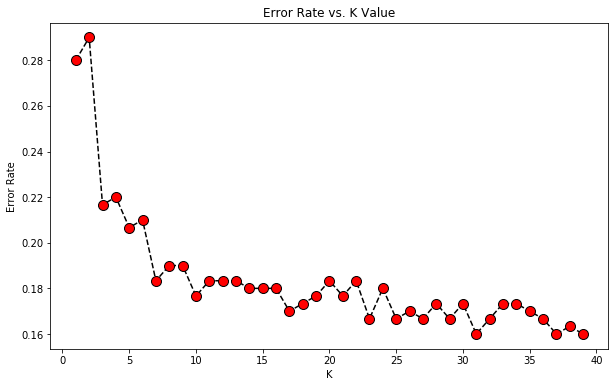

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

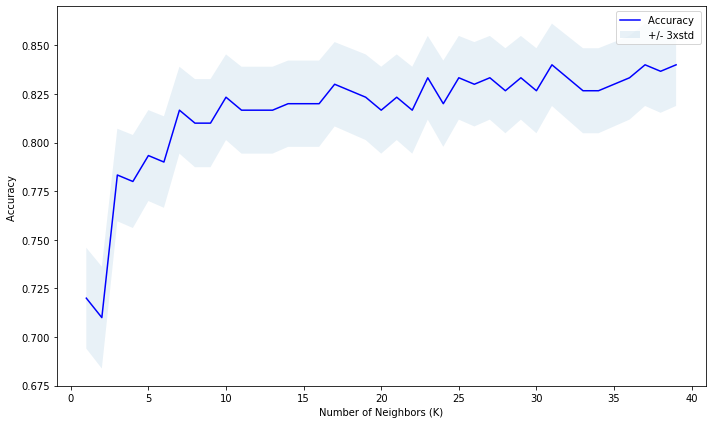

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,Ks),mean_acc,'blue')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()

## The best K Value

Using the plots above we can see that the best value for K is 31.
We will create a function to display the Confusion Matrix and evaluate our model.

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [24]:
def show_confusion_matrix(C,class_labels=['0','1']):
    """
    C: ndarray, shape (2,2) as given by scikit-learn confusion_matrix function
    class_labels: list of strings, default simply labels 0 and 1.

    Draws confusion matrix with associated metrics.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert C.shape == (2,2), "Confusion matrix should be from binary classification only."
    
    # true negative, false positive, etc...
    tn = C[0,0]; fp = C[0,1]; fn = C[1,0]; tp = C[1,1];

    NP = fn+tp # Num positive examples
    NN = tn+fp # Num negative examples
    N  = NP+NN

    fig = plt.figure(figsize=(10,10))
    ax  = fig.add_subplot(111)
    ax.imshow(C, interpolation='nearest', cmap=plt.cm.coolwarm)

    # Draw the grid boxes
    ax.set_xlim(-0.5,2.5)
    ax.set_ylim(2.5,-0.5)
    ax.plot([-0.5,2.5],[0.5,0.5], '-k', lw=2)
    ax.plot([-0.5,2.5],[1.5,1.5], '-k', lw=2)
    ax.plot([0.5,0.5],[-0.5,2.5], '-k', lw=2)
    ax.plot([1.5,1.5],[-0.5,2.5], '-k', lw=2)

    # Set xlabels
    ax.set_xlabel('Predicted Label', fontsize=16)
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(class_labels + [''])
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    # These coordinate might require some tinkering. Ditto for y, below.
    ax.xaxis.set_label_coords(0.34,1.06)

    # Set ylabels
    ax.set_ylabel('True Label', fontsize=16, rotation=90)
    ax.set_yticklabels(class_labels + [''],rotation=90)
    ax.set_yticks([0,1,2])
    ax.yaxis.set_label_coords(-0.09,0.65)


    # Fill in initial metrics: tp, tn, etc...
    ax.text(0,0,
            'True Neg: %d\n(Num Neg: %d)'%(tn,NN),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,1,
            'False Neg: %d'%fn,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,0,
            'False Pos: %d'%fp,
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))


    ax.text(1,1,
            'True Pos: %d\n(Num Pos: %d)'%(tp,NP),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    # Fill in secondary metrics: accuracy, true pos rate, etc...
    ax.text(2,0,
            'False Pos Rate: %.2f'%(fp / (fp+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,1,
            'True Pos Rate: %.2f'%(tp / (tp+fn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(2,2,
            'Accuracy: %.2f'%((tp+tn+0.)/N),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(0,2,
            'Neg Pre Val: %.2f'%(1-fn/(fn+tn+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.text(1,2,
            'Pos Pred Val: %.2f'%(tp/(tp+fp+0.)),
            va='center',
            ha='center',
            bbox=dict(fc='w',boxstyle='round,pad=1'))

    ax.set_ylim(2.5, -0.5)
    plt.tight_layout()
    plt.show()

K = 31


Confusion Matrix


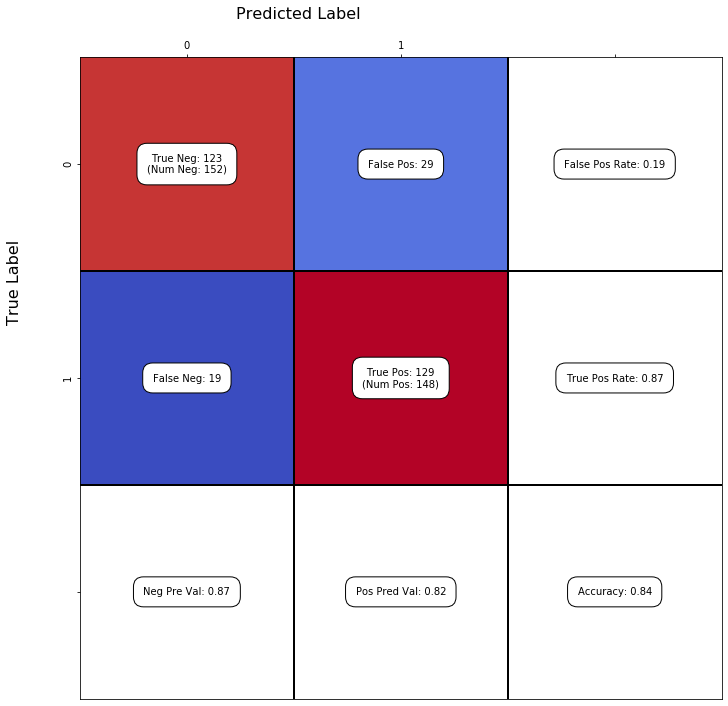



Classification Report
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



In [27]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)
print('K = 31')
print('\n')
print('Confusion Matrix')
C = confusion_matrix(y_test,predict)
show_confusion_matrix(C,['0','1'])
print('\n')
print('Classification Report')
print(classification_report(y_test,predict))

In [29]:
print("Train set Accuracy: ", accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", accuracy_score(y_test, predict))

Train set Accuracy:  0.8371428571428572
Test set Accuracy:  0.84
